In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px grey solid !important;
  color: black !important;
}
</style>

In [2]:
# ignore future warning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import re
import time

# processing of text
from preprocessing import Preprocessing

# models
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader
import torchtext
from torchtext.legacy import data as dt
from model_functions import *
from model_torch import *
from argparse import Namespace
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# inicjalize table for result
result = ''

In [3]:
data = Preprocessing()

In [4]:
# data.load_data()
# data.remove_quoting_comments()
# data.demojize()
# data.clean_text(with_emoji=True)
# data.stopwords_remove()
# data.lemmatize_text()
# data.correct_typo_words()
# data.token_join()
# data.write_to_file(name='cleaned_data_binary')

In [5]:
args = Namespace(
    path_model="cleaned_data_with_stopwords_without_emoji",
    path_torch="cleaned_data_with_stopwords_without_emoji.csv",
    vocab_size = 400000,
    BATCH_SIZE = 64,
    EMBEDDING_DIM = 100,
    HIDDEN_DIM = 256,
    OUTPUT_DIM = 3,
    N_LAYERS = 2,
    BIDIRECTIONAL = True,
    DROPOUT = 0.5,
    N_EPOCHS = 15,
)

# Model

In [6]:
data.split_train_val_test(file_name=args.path_model)
data.tfidf_vectorizer()
data.count_vectorizer()

### TFIDF VEctorizer

Results for Random Forest TFIDF:
Random Forest TFIDF accuracy: 0.8295
Random Forest TFIDF f-score: 0.7994
Random Forest TFIDF precision: 0.8373


C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


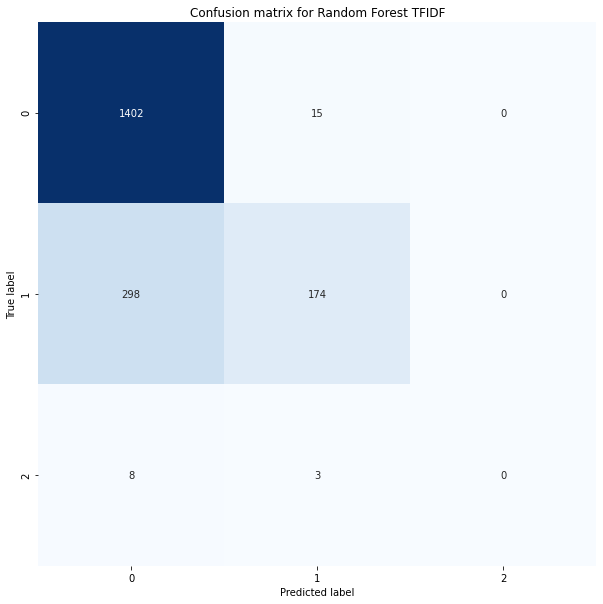

In [7]:
# Random Forest

rf = Modeling(RandomForestClassifier(n_estimators=1000, random_state=0), 
              data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
              'Random Forest TFIDF')
rf.fit_predict()
rf.print_results()
rf.plot_confusion_matrix()
result = rf.add_to_table()

Results for Logistic Regression TFIDF:
Logistic Regression TFIDF accuracy: 0.8442
Logistic Regression TFIDF f-score: 0.8267
Logistic Regression TFIDF precision: 0.8384


C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


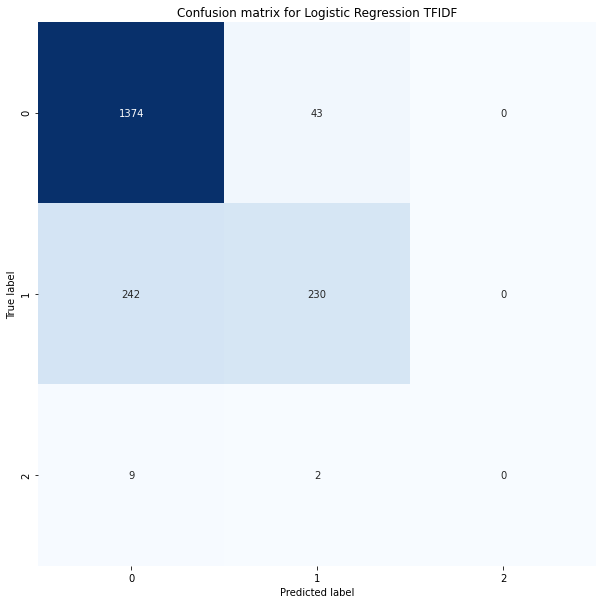

In [8]:
# Logistic Regression

log_reg = Modeling(LogisticRegression(solver='newton-cg'), 
                   data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
                   'Logistic Regression TFIDF')
log_reg.fit_predict()
log_reg.print_results()
log_reg.plot_confusion_matrix()
result = log_reg.add_to_table()

Results for Logistic Regression SMOTE TFIDF:
Logistic Regression SMOTE TFIDF accuracy: 0.8447
Logistic Regression SMOTE TFIDF f-score: 0.828
Logistic Regression SMOTE TFIDF precision: 0.8398


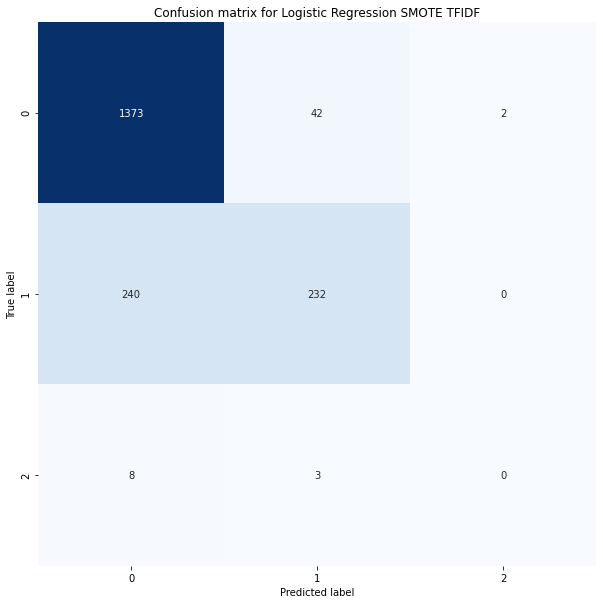

In [9]:
# SMOTE for Logistic Regression

log_reg_smote = Modeling(LogisticRegression(solver='newton-cg'), 
                         data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
                         'Logistic Regression SMOTE TFIDF')
log_reg_smote.sample(SMOTE(sampling_strategy='minority'))
log_reg_smote.fit_predict()
log_reg_smote.print_results()
log_reg_smote.plot_confusion_matrix()
result = log_reg_smote.add_to_table()

Results for SVC TFIDF:
SVC TFIDF accuracy: 0.8374
SVC TFIDF f-score: 0.8131
SVC TFIDF precision: 0.8394


C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


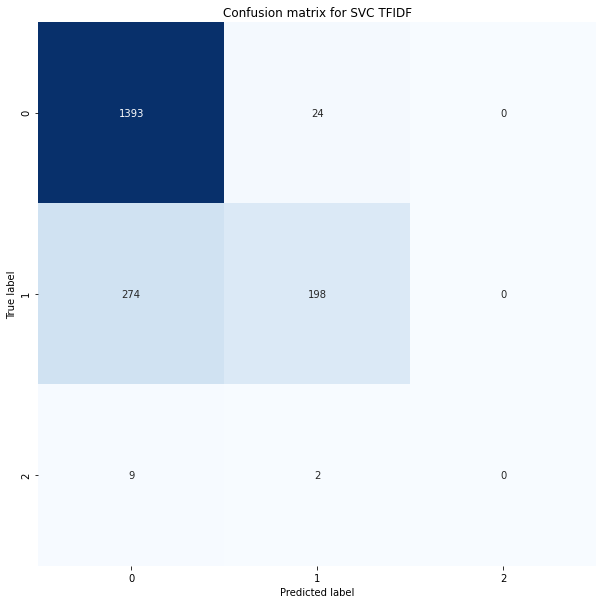

In [10]:
# SVC

svc = Modeling(SVC(probability=True), 
               data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
               'SVC TFIDF')
svc.fit_predict()
svc.print_results()
svc.plot_confusion_matrix()
result = svc.add_to_table()

Results for SVC SMOTE TFIDF:
SVC SMOTE TFIDF accuracy: 0.8363
SVC SMOTE TFIDF f-score: 0.8109
SVC SMOTE TFIDF precision: 0.8402


C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


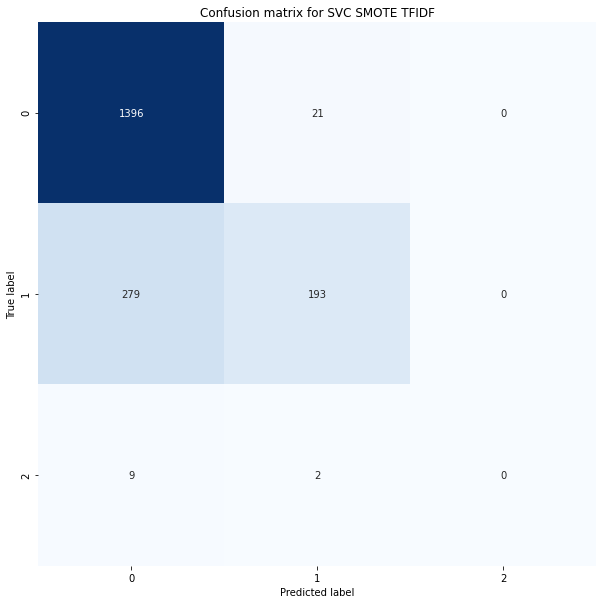

In [11]:
# SMOTE for SVC

svc_smote = Modeling(SVC(probability=True), 
                     data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
                     'SVC SMOTE TFIDF')
svc_smote.sample(SMOTE(sampling_strategy='minority'))
svc_smote.fit_predict()
svc_smote.print_results()
svc_smote.plot_confusion_matrix()
result = svc_smote.add_to_table()

C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for Bayes TFIDF:
Bayes TFIDF accuracy: 0.7874
Bayes TFIDF f-score: 0.7271
Bayes TFIDF precision: 0.8093


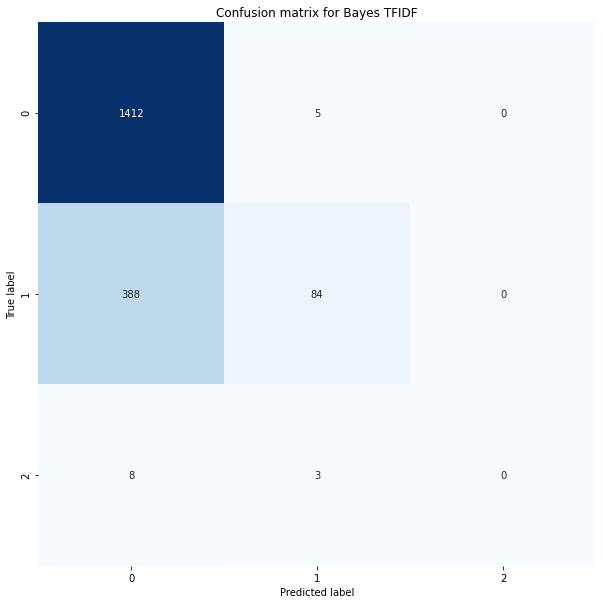

In [12]:
# Bayes

bayes = Modeling(MultinomialNB(), 
                 data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
                 'Bayes TFIDF')
bayes.fit_predict()
bayes.print_results()
bayes.plot_confusion_matrix()
result = bayes.add_to_table()

Results for Bayes SMOTE TFIDF:
Bayes SMOTE TFIDF accuracy: 0.7632
Bayes SMOTE TFIDF f-score: 0.7131
Bayes SMOTE TFIDF precision: 0.8171


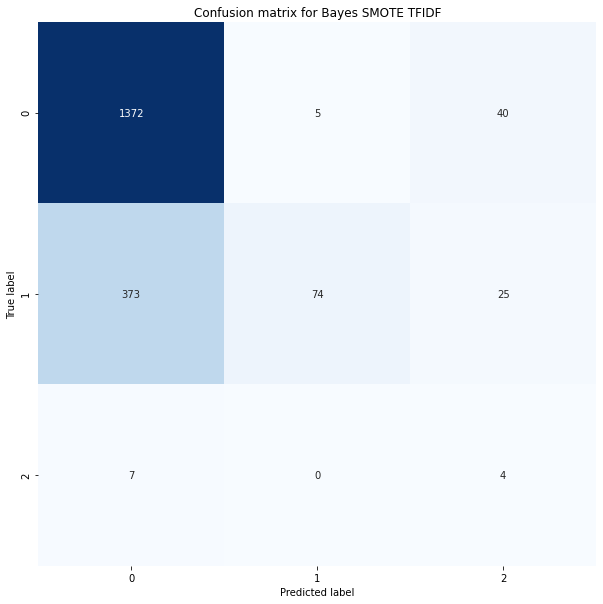

In [13]:
# SMOTE for Bayes

bayes_smote = Modeling(MultinomialNB(), 
                       data.X_train_tfidf, data.X_val_tfidf, data.y_train, data.y_val, result,
                       'Bayes SMOTE TFIDF')
bayes_smote.sample(SMOTE(sampling_strategy='minority'))
bayes_smote.fit_predict()
bayes_smote.print_results()
bayes_smote.plot_confusion_matrix()
result = bayes_smote.add_to_table()

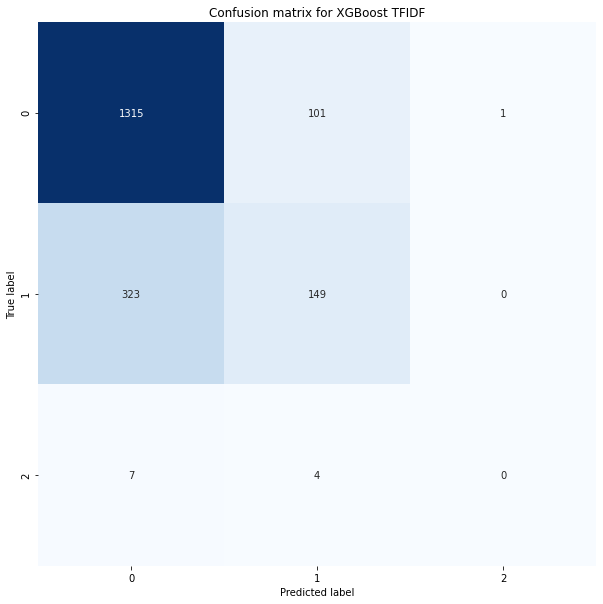

In [14]:
# XGBoost

y_pred = XG_boost(data.X_train_tfidf, data.y_train, data.X_val_cv, data.y_val)
result = add_to_table_xgboost(data.y_val,
                              y_pred,
                              result,
                              'XGBoost TFIDF')
plot_confusion_matrix(data.y_val, y_pred, 'XGBoost TFIDF')

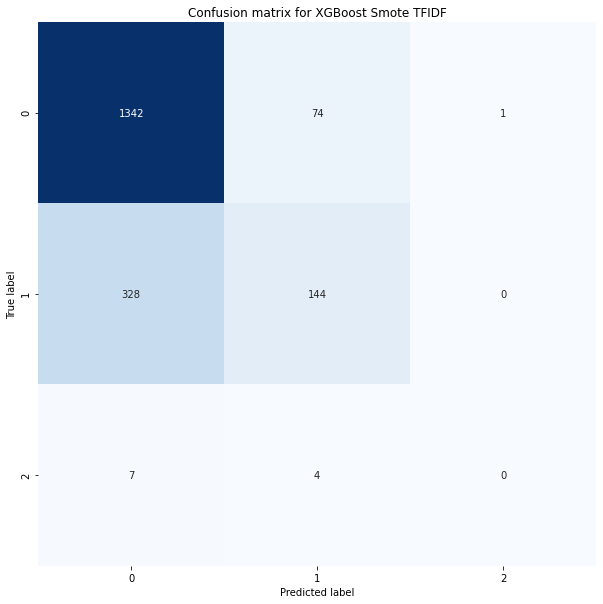

In [15]:
# XGBoost smote

y_pred = XG_boost_smote(data.X_train_tfidf, data.y_train, data.X_val_cv, data.y_val)
result = add_to_table_xgboost(data.y_val,
                              y_pred,
                              result,
                              'XGBoost Smote TFIDF')
plot_confusion_matrix(data.y_val, y_pred, 'XGBoost Smote TFIDF')

### Count Vectorizer

In [16]:
# Random Forest

rf_cv = Modeling(RandomForestClassifier(n_estimators=1000, random_state=0), 
              data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
              'Random Forest CV')
rf_cv.fit_predict()
rf_cv.print_results()
result = rf_cv.add_to_table()

Results for Random Forest CV:
Random Forest CV accuracy: 0.8389
Random Forest CV f-score: 0.8161
Random Forest CV precision: 0.8377


C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Random Forest SMOTE

rf_cv_smote = Modeling(RandomForestClassifier(n_estimators=1000, random_state=0), 
              data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
              'Random Forest SMOTE CV')
rf_cv_smote.sample(SMOTE(sampling_strategy='minority'))
rf_cv_smote.fit_predict()
rf_cv_smote.print_results()
result = rf_cv_smote.add_to_table()

Results for Random Forest SMOTE CV:
Random Forest SMOTE CV accuracy: 0.7368
Random Forest SMOTE CV f-score: 0.71
Random Forest SMOTE CV precision: 0.8128


C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for Logistic Regression CV:
Logistic Regression CV accuracy: 0.8595
Logistic Regression CV f-score: 0.848
Logistic Regression CV precision: 0.8506


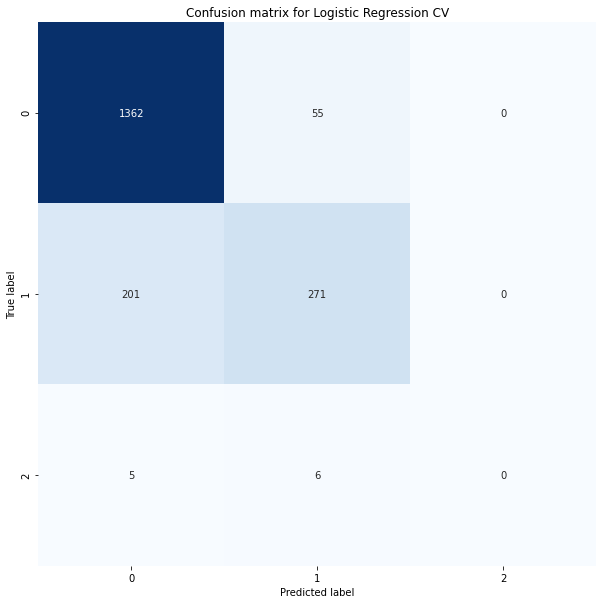

In [18]:
# Logistic Regression

log_reg_cv = Modeling(LogisticRegression(solver='newton-cg'), 
                   data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                   'Logistic Regression CV')
log_reg_cv.fit_predict()
log_reg_cv.print_results()
log_reg_cv.plot_confusion_matrix()
result = log_reg_cv.add_to_table()

Results for Logistic Regression SMOTE CV:
Logistic Regression SMOTE CV accuracy: 0.8
Logistic Regression SMOTE CV f-score: 0.8188
Logistic Regression SMOTE CV precision: 0.8516


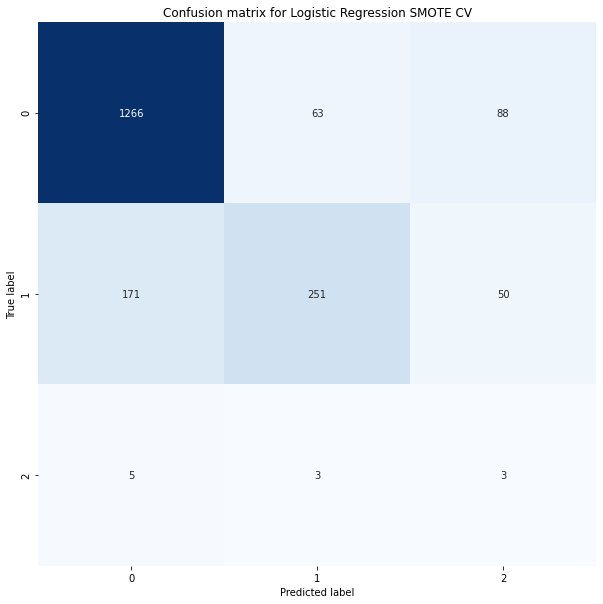

In [19]:
# SMOTE for Logistic Regression

log_reg_smote_cv = Modeling(LogisticRegression(solver='newton-cg'), 
                         data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                         'Logistic Regression SMOTE CV')
log_reg_smote_cv.sample(SMOTE(sampling_strategy='minority'))
log_reg_smote_cv.fit_predict()
log_reg_smote_cv.print_results()
log_reg_smote_cv.plot_confusion_matrix()
result = log_reg_smote_cv.add_to_table()

Results for SVC CV:
SVC CV accuracy: 0.8368
SVC CV f-score: 0.8097
SVC CV precision: 0.8454


C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


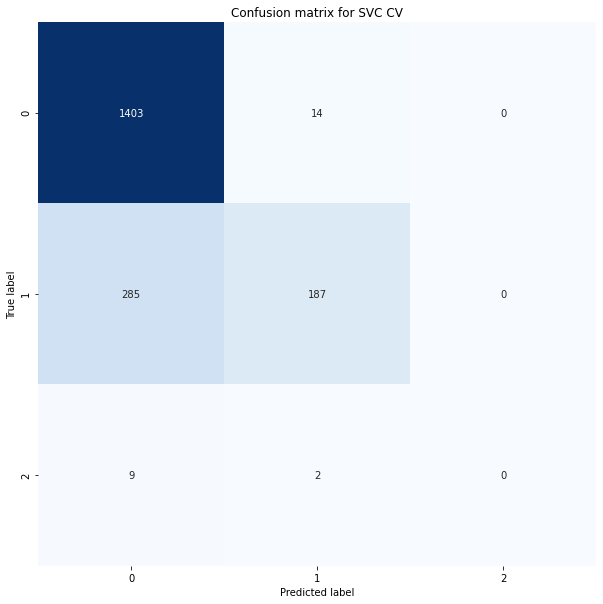

In [20]:
# SVC

svc_cv = Modeling(SVC(probability=True), 
               data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
               'SVC CV')
svc_cv.fit_predict()
svc_cv.print_results()
svc_cv.plot_confusion_matrix()
result = svc_cv.add_to_table()

Results for SVC SMOTE CV:
SVC SMOTE CV accuracy: 0.8153
SVC SMOTE CV f-score: 0.787
SVC SMOTE CV precision: 0.844


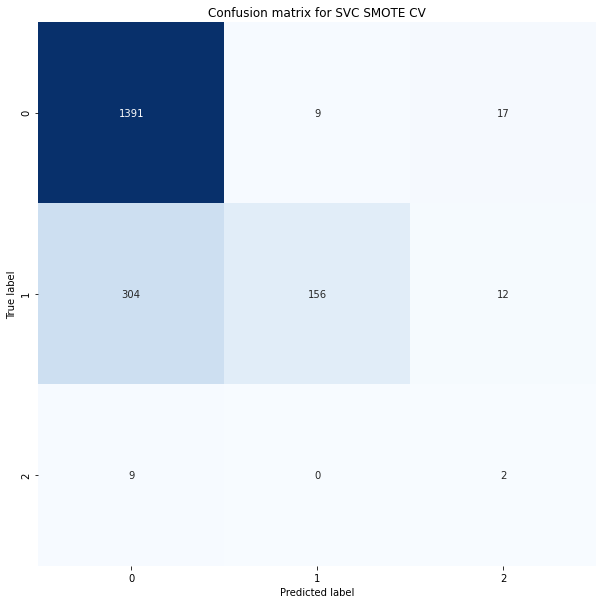

In [21]:
# SMOTE for SVC

svc_smote_cv = Modeling(SVC(probability=True), 
                     data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                     'SVC SMOTE CV')
svc_smote_cv.sample(SMOTE(sampling_strategy='minority'))
svc_smote_cv.fit_predict()
svc_smote_cv.print_results()
svc_smote_cv.plot_confusion_matrix()
result = svc_smote_cv.add_to_table()

Results for Bayes CV:
Bayes CV accuracy: 0.86
Bayes CV f-score: 0.8511
Bayes CV precision: 0.8499


C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


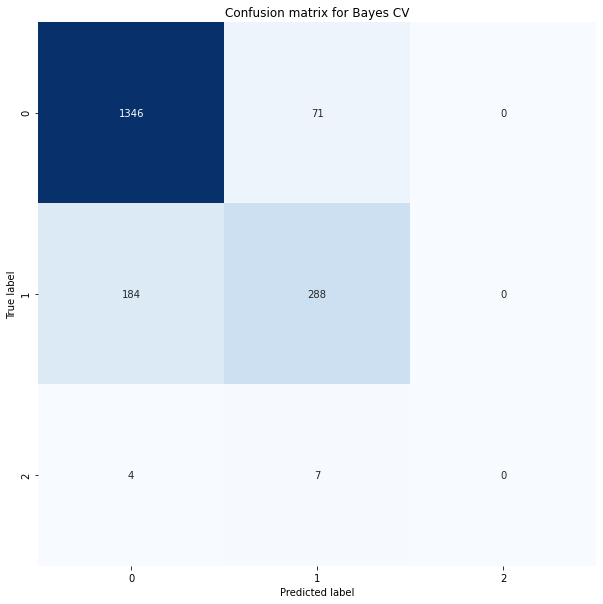

In [22]:
# Bayes

bayes_cv = Modeling(MultinomialNB(), 
                 data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                 'Bayes CV')
bayes_cv.fit_predict()
bayes_cv.print_results()
bayes_cv.plot_confusion_matrix()
result = bayes_cv.add_to_table()

Results for Bayes SMOTE CV:
Bayes SMOTE CV accuracy: 0.8458
Bayes SMOTE CV f-score: 0.8438
Bayes SMOTE CV precision: 0.8508


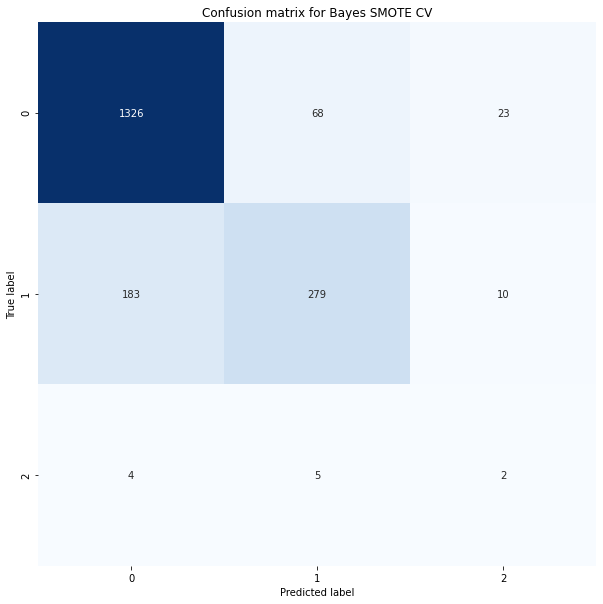

In [23]:
# SMOTE for Bayes

bayes_smote_cv = Modeling(MultinomialNB(), 
                       data.X_train_cv, data.X_val_cv, data.y_train, data.y_val, result,
                       'Bayes SMOTE CV')
bayes_smote_cv.sample(SMOTE(sampling_strategy='minority'))
bayes_smote_cv.fit_predict()
bayes_smote_cv.print_results()
bayes_smote_cv.plot_confusion_matrix()
result = bayes_smote_cv.add_to_table()

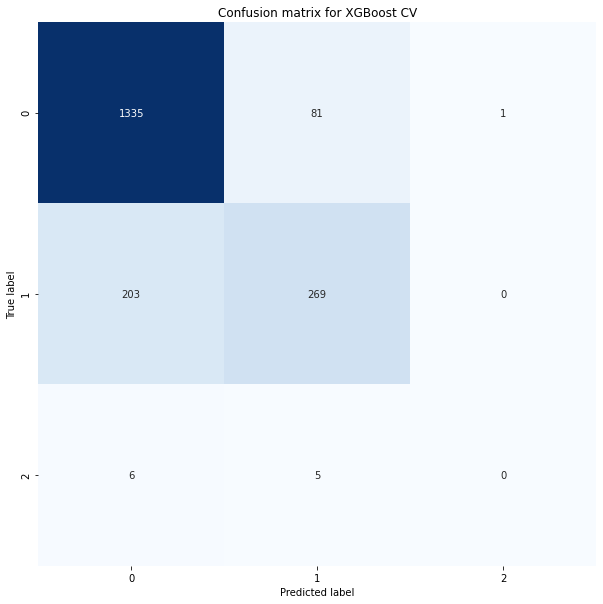

In [24]:
# XGBoost

y_pred = XG_boost(data.X_train_cv, data.y_train, data.X_val_cv, data.y_val)
result = add_to_table_xgboost(data.y_val,
                              y_pred,
                              result,
                              'XGBoost CV')
plot_confusion_matrix(data.y_val, y_pred, 'XGBoost CV')

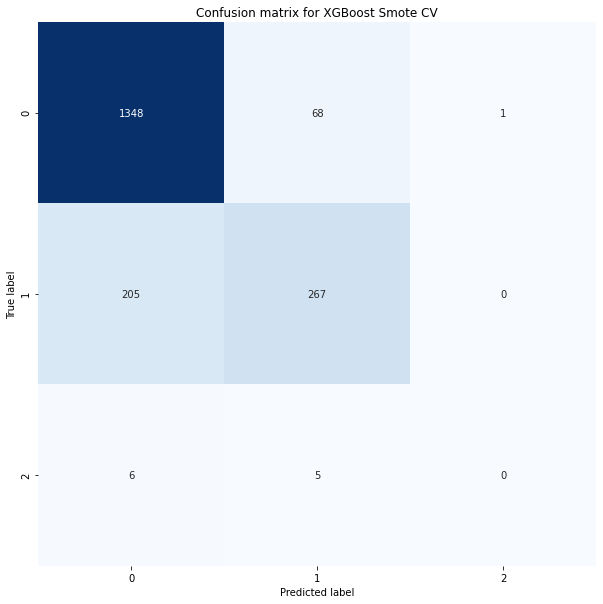

In [25]:
# XGBoost smote

y_pred = XG_boost_smote(data.X_train_cv, data.y_train, data.X_val_cv, data.y_val)
result = add_to_table_xgboost(data.y_val,
                              y_pred,
                              result,
                              'XGBoost SMOTE CV')
plot_confusion_matrix(data.y_val, y_pred, 'XGBoost Smote CV')

### Gensim for the best model

C:\Users\kotul\anaconda3\envs\praca37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


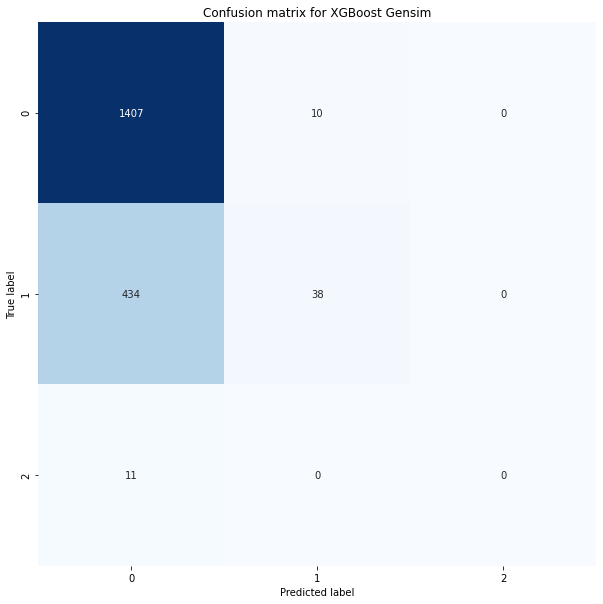

In [26]:
y_pred_g = XG_boost_gensim(data.X_train, data.X_val, data.y_train)
result = add_to_table_xgboost(data.y_val,
                              y_pred_g,
                              result,
                              'XGBoost Gensim')
plot_confusion_matrix(data.y_val, y_pred_g, 'XGBoost Gensim')

In [27]:
result.transpose().sort_values(by='F-score', ascending=False)

,Accuracy,F-score,Precision
Bayes CV,0.8600,0.8511,0.8499
Logistic Regression CV,0.8595,0.8480,0.8506
Bayes SMOTE CV,0.8458,0.8438,0.8508
XGBoost SMOTE CV,0.8500,0.8390,0.8399
XGBoost CV,0.8442,0.8341,0.8331
Logistic Regression SMOTE TFIDF,0.8447,0.8280,0.8398
Logistic Regression TFIDF,0.8442,0.8267,0.8384
Logistic Regression SMOTE CV,0.8000,0.8188,0.8516
Random Forest CV,0.8389,0.8161,0.8377
SVC TFIDF,0.8374,0.8131,0.8394


### LSTM multiclass

In [28]:
LABEL = dt.LabelField(dtype = torch.long)
TEXT = dt.Field(tokenize=simple_tokinizer, include_lengths = True)
fields = [('text', TEXT), ('label', LABEL)]

twitterDataset = torchtext.legacy.data.TabularDataset(
        args.path_torch, 
        format="CSV", 
        fields=fields,
        skip_header=True)

train_data, valid_data, test_data = twitterDataset.split(split_ratio=[0.7,0.15,0.15])

TEXT.build_vocab(train_data, max_size=args.vocab_size)

LABEL.build_vocab(train_data)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = dt.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = args.BATCH_SIZE,
    sort_within_batch = True,
    sort_key = lambda x: len(x.text))


model = RNN(len(TEXT.vocab), 
            args.EMBEDDING_DIM, 
            args.HIDDEN_DIM, 
            args.OUTPUT_DIM, 
            args.N_LAYERS, 
            args.BIDIRECTIONAL, 
            args.DROPOUT, 
            TEXT.vocab.stoi[TEXT.pad_token])

optimizer = optim.Adam(model.parameters())


criterion = nn.CrossEntropyLoss() 
model = model.to(device)
criterion = criterion.to(device)

In [29]:
# args.N_EPOCHS = 15

best_valid_loss = float('inf')

for epoch in range(args.N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc, train_prec = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc, valid_prec = evaluate(model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'lstm_model.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Train prec: {train_prec*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% | Valid prec: {valid_prec*100:.2f}%')

Epoch: 01 | Epoch Time: 2m 48s
	Train Loss: 0.629 | Train Acc: 74.15% | Train prec: 62.05%
	 Val. Loss: 0.549 |  Val. Acc: 75.77% | Valid prec: 73.79%
Epoch: 02 | Epoch Time: 2m 19s
	Train Loss: 0.551 | Train Acc: 75.48% | Train prec: 75.45%
	 Val. Loss: 0.482 |  Val. Acc: 80.51% | Valid prec: 79.02%
Epoch: 03 | Epoch Time: 2m 1s
	Train Loss: 0.495 | Train Acc: 78.53% | Train prec: 78.61%
	 Val. Loss: 0.472 |  Val. Acc: 80.86% | Valid prec: 80.29%
Epoch: 04 | Epoch Time: 1m 55s
	Train Loss: 0.456 | Train Acc: 80.67% | Train prec: 80.80%
	 Val. Loss: 0.470 |  Val. Acc: 80.23% | Valid prec: 80.24%
Epoch: 05 | Epoch Time: 2m 0s
	Train Loss: 0.412 | Train Acc: 82.89% | Train prec: 83.07%
	 Val. Loss: 0.438 |  Val. Acc: 81.94% | Valid prec: 81.22%
Epoch: 06 | Epoch Time: 2m 9s
	Train Loss: 0.371 | Train Acc: 84.77% | Train prec: 84.37%
	 Val. Loss: 0.457 |  Val. Acc: 80.40% | Valid prec: 81.18%
Epoch: 07 | Epoch Time: 2m 4s
	Train Loss: 0.327 | Train Acc: 86.58% | Train prec: 86.27%
	 Val. 

### LSTM binary

In [30]:
args = Namespace(
    path_torch="cleaned_data_binary_with_stopwords_and_emoji.csv",
    vocab_size = 400000,
    BATCH_SIZE = 64,
    EMBEDDING_DIM = 100,
    HIDDEN_DIM = 256,
    OUTPUT_DIM = 1,
    N_LAYERS = 2,
    BIDIRECTIONAL = True,
    DROPOUT = 0.5,
    N_EPOCHS = 15,
)

In [31]:
LABEL = dt.LabelField(dtype = torch.long)
TEXT = dt.Field(tokenize=simple_tokinizer, include_lengths = True)
fields = [('text', TEXT), ('label', LABEL)]

twitterDataset = torchtext.legacy.data.TabularDataset(
        args.path_torch, 
        format="CSV", 
        fields=fields,
        skip_header=True)

train_data, valid_data, test_data = twitterDataset.split(split_ratio=[0.7,0.15,0.15])

TEXT.build_vocab(train_data, max_size=args.vocab_size)

LABEL.build_vocab(train_data)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = dt.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = args.BATCH_SIZE,
    sort_within_batch = True,
    sort_key = lambda x: len(x.text))


model = RNN(len(TEXT.vocab), 
            args.EMBEDDING_DIM, 
            args.HIDDEN_DIM, 
            args.OUTPUT_DIM, 
            args.N_LAYERS, 
            args.BIDIRECTIONAL, 
            args.DROPOUT, 
            TEXT.vocab.stoi[TEXT.pad_token])

optimizer = optim.Adam(model.parameters())


criterion = nn.BCEWithLogitsLoss()
model = model.to(device)
criterion = criterion.to(device)

In [32]:
# args.N_EPOCHS = 15

best_valid_loss = float('inf')

for epoch in range(args.N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc, train_prec = train_binary(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc, valid_prec = evaluate_binary(model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'lstm_model_binary.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Train prec: {train_prec*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% | Valid prec: {valid_prec*100:.2f}%')

Epoch: 01 | Epoch Time: 2m 1s
	Train Loss: 0.563 | Train Acc: 74.26% | Train prec: 63.86%
	 Val. Loss: 0.503 |  Val. Acc: 75.65% | Valid prec: 78.08%
Epoch: 02 | Epoch Time: 1m 57s
	Train Loss: 0.510 | Train Acc: 76.53% | Train prec: 77.97%
	 Val. Loss: 0.470 |  Val. Acc: 76.35% | Valid prec: 74.90%
Epoch: 03 | Epoch Time: 2m 8s
	Train Loss: 0.466 | Train Acc: 78.37% | Train prec: 79.07%
	 Val. Loss: 0.481 |  Val. Acc: 76.89% | Valid prec: 78.74%
Epoch: 04 | Epoch Time: 2m 3s
	Train Loss: 0.435 | Train Acc: 79.55% | Train prec: 81.76%
	 Val. Loss: 0.413 |  Val. Acc: 81.75% | Valid prec: 81.86%
Epoch: 05 | Epoch Time: 1m 57s
	Train Loss: 0.379 | Train Acc: 83.89% | Train prec: 84.42%
	 Val. Loss: 0.392 |  Val. Acc: 82.21% | Valid prec: 81.90%
Epoch: 06 | Epoch Time: 2m 5s
	Train Loss: 0.347 | Train Acc: 85.56% | Train prec: 85.92%
	 Val. Loss: 0.401 |  Val. Acc: 82.88% | Valid prec: 83.57%
Epoch: 07 | Epoch Time: 2m 26s
	Train Loss: 0.306 | Train Acc: 87.12% | Train prec: 87.39%
	 Val. 